<a href="https://colab.research.google.com/github/Jihyozhixiao/YBIGTA/blob/master/%EA%B9%80%EC%A7%80%ED%9A%A8_%ED%81%AC%EB%A1%A4%EB%A7%81_%EA%B3%BC%EC%A0%9C_trial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 크롤링 실습

In [1]:
# 필요한 라이브러리 다운로드
# 이미 설치되어 있으면 실행하지 않으셔도 됩니다

!pip3 install requests
!pip3 install bs4
!pip3 install selenium

     |████████████████████████████████| 958 kB 5.3 MB/s 
     |████████████████████████████████| 356 kB 53.6 MB/s 
     |████████████████████████████████| 138 kB 44.2 MB/s 
     |████████████████████████████████| 55 kB 3.8 MB/s 
     |████████████████████████████████| 3.6 MB 44.2 MB/s 
     |████████████████████████████████| 58 kB 5.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.8 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


### GET 요청하기

/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.8) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


<Response [200]>


'<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="제주도 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'제주도\'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="\'제주도\'의 네이버 통합검색 결과입니다."> <title>제주도 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220210.css"> <link rel="stylesheet" type="text/css" href
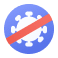
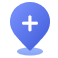
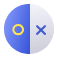
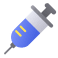
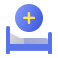

In [2]:
import requests

url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=%EC%A0%9C%EC%A3%BC%EB%8F%84&oquery=%EC%A0%9C%EC%A3%BC%EB%8F%84+%EC%97%AC%ED%96%89&tqi=htg9ydp0YiRsseJsM%2FNsssssshV-011537'
res = requests.get(url)

print(res) # 응답 객체
res.text # HTML 텍스트

#### HTTP 상태 코드
 - 1xx (정보): 요청을 받았으며 프로세스를 계속한다
 - 2xx (성공): 요청을 성공적으로 받았으며 인식했고 수용하였다
 - 3xx (리다이렉션): 요청 완료를 위해 추가 작업 조치가 필요하다
 - 4xx (클라이언트 오류): 요청의 문법이 잘못되었거나 요청을 처리할 수 없다
 - 5xx (서버 오류): 서버가 명백히 유효한 요청에 대해 충족을 실패했다

[출처: 위키피디아](https://ko.wikipedia.org/wiki/HTTP_%EC%83%81%ED%83%9C_%EC%BD%94%EB%93%9C)

In [3]:
res.status_code # HTTP 상태 코드 

200

In [5]:
# 임시 html 텍스트
html = '''
<html>
  <head>
    <title>Example HTML</title>
  </head>
  <body>
    <div id='first' class='Example'>
      <h3 title='Good Content Title'>Contents Title</h3>
      <p>Test contents</p>
    </div>
    <div id='second' class='Example'>
      <p>Text1</p>
      <p>Text2</p>
      <p>Text3</p>
    </div>
  </body>
</html>
'''

### find(), find_all()
태그 검색   
- find(tag, attributes, recursive, text, keywords)   
- find_all(tag, attributes, recursive, text, limit, keywords)   

### get_text()
태그 내 텍스트 반환(부모 태그의 경우 자식 태그의 텍스트를 모두 반환)

In [6]:
from bs4 import BeautifulSoup

# 첫 번째 인자: 파싱할 객체
# 두 번째 인자: 사용할 parser(구문 분석기)
soup = BeautifulSoup(html, 'html.parser') 

### 간단한 예제

네이버 검색 데이터 추출


[예제 URL](https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%A0%9C%EC%A3%BC%EB%8F%84)

<!DOCTYPE doctype html>
 <html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="제주도 : 네이버 통합검색" property="og:title"> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'제주도'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'제주도'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>제주도 : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_220210.css" rel="stylesheet" type="text/css"/> <link href="https://ssl.pstatic.net
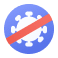
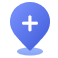
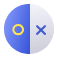
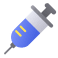
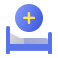

In [7]:
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EC%A0%9C%EC%A3%BC%EB%8F%84'
res = requests.get(url)

# 첫번째 인자를 텍스트로 넣어줘야 함
soup = BeautifulSoup(res.text, 'html.parser')
soup

In [8]:
title = soup.find('a')
title

<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>

In [9]:
title.get_text()

'메뉴 영역으로 바로가기'

In [10]:
# keyword로 class를 사용할 때는 _를 붙여주어야 함
# 파이썬의 클래스와 중복되기 떼문
title = soup.find_all('span', class_="fix")
title

[<span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span><span>@txt@</span></span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@txt@</span>,
 <span class="fix"><span class="common_ico_kwd"><i class="imsc ico_search"></i></span>@query@ <span class="context">@intend@</span></span>]

In [11]:
# 배열에 저장
all_title = [item.get_text() for item in title]
all_title

['@txt@', '@txt@', '@txt@', '@query@ @intend@']

## Selenium

In [12]:
!pip3 install selenium
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

# path 변수에 자신의 chromedriver가 있는 파일 위치를 할당
# window : ~/chromedriver.exe
# mac : ~/chromedriver (.exe 빼기) 

### CSS Selector
HTML 요소를 선택해주는 요소
- 태그 선택자
- 클래스 선택자(.)
- ID 선택자(#)
- 자식 선택자(>)
- 하위 선택자( )

## 크롤링 예제

cine21 배우 랭킹 사이트 크롤링
  - 사이트 주소: http://www.cine21.com/rank/person/
  - 요청 방식 확인 방법: 크롬 개발자 모드로 들어가서, Network -> Fetch/XHR -> content 페이지의 요청 방식 확인
    - Request URL: http://www.cine21.com/rank/person/content
    - Request Method: POST
    - Form data
      - section = 'actor'
      - period_start = '2021-07'
      - gender = 'all'
      - page = 1 

In [16]:
import re
import requests
from bs4 import BeautifulSoup

In [17]:
cine21_url = 'http://www.cine21.com/rank/person/'
res = requests.get(cine21_url)
print(res.text) # get으로 할 경우 배우 리스트가 응답으로 반환되지 않음(사이트마다 다름)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
	<meta property="fb:pages" content="1641311652800771" />
	<meta name="google-site-verification" content="vTM0gmeRzJwn1MIM1LMSp3cxP_SaBzch1ziRY255RHw" />
	<meta name="google-site-verification" content="5yOe6b_e_3rr7vNDwgXJw_8wLZQGx4lJ_V48KNPrqkA" />
	<meta name="naver-site-verification" content="20defde86fc4464f2693891567a98905bd0a60d1" />
	<meta name='dailymotion-domain-verification' content='dmds9ks357rhqvdnk' />
	<meta http-equiv="Content-Type" content="text/html; charset=utf-8" />
	<meta http-equiv="X-UA-Compatible" content="IE=edge">
	<title>씨네21</title>
	<link rel="stylesheet" type="text/css" media="all" href="/inc/www/css/default1.css" />
	<link rel="stylesheet" type="text/css" media="all" href="/inc/www/css/content1.css" />
	<script src="https://ajax.googleapis.com/ajax/libs/jquery/1.12.0/jquery.min.js"></scr

### 크롤링 주소 요청
dictionary를 이용하여 form data 생성   
request모듈의 post 함수를 이용하여 요청 전송

- 첫 번째 인자: 요청 url
- 두 번째 인자: form data

In [18]:
cine21_url = 'http://www.cine21.com/rank/person/content'
post_data = dict()
post_data['section'] = 'actor'
post_data['period_start'] = '2022-01'
post_data['gender'] = 'all'
post_data['page'] = 1
#그 관리자 텝에서 network 부분에서 확인 가능

res = requests.post(cine21_url, data=post_data)

In [19]:
res.text

'\t\t\t<ul class="people_list">\r\n\t\t\t\t<li class="people_li">\r\n\t\t\t\t\t<a href="/db/person/info/?person_id=78487"><img src="https://image.cine21.com/resize/cine21/still/2017/1207/15_06_46__5a28da76c2e01[X145,145].jpg" alt="" class="people_thumb" target="_blank" /></a>\r\n\t\t\t\t\t<div class="name"><a href="/db/person/info/?person_id=78487">강하늘(2편)</a></div>\r\n\t\t\t\t\t<ul class="num_info">\r\n\t\t\t\t\t\t<li><span class="tit">흥행지수</span><strong>80,382</strong></li>\r\n\t\t\t\t\t\t<!--\r\n\t\t\t\t\t\t<li><a href="#" class="btn_graph"><span class="ico"></span><span>흥행성적<br />그래프로 보기</span></a></li>\r\n\t\t\t\t\t\t-->\r\n\t\t\t\t\t</ul>\r\n\t\t\t\t\t<!-- 영화포스터는 최대 5개까지만 -->\r\n\t\t\t\t\t<ul class="mov_list">\r\n\t\t\t\t\t\t\r\n\t\t\t\t\t\t\t<li>\r\n\t\t\t\t\t\t\t\t<a href="/movie/info/?movie_id=56540">\r\n\t\t\t\t\t\t\t\t\t<img src="https://image.cine21.com/resize/cine21/poster/2022/0127/56540_61f1fcfdd84ce[X85,120].jpg" alt="" class="thumb"  target="_blank" />\r\n\t\t\t\t\t\t\

In [20]:
soup = BeautifulSoup(res.text, 'html.parser')

### 배우 이름 추출

In [21]:
# select(): find_all()과 동일한 작동을 하는 함수
# 차이점은 파라미터로 css selector를 사용
# 좀 더 간편하다
soup.select('li.people_li div.name') # class가 people_li인 li 태그 중 class가 name인 div 태그 list

[<div class="name"><a href="/db/person/info/?person_id=78487">강하늘(2편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=56311">한효주(1편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=71308">이광수(2편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=15225">권상우(1편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=60358">조진웅(2편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=95811">채수빈(1편)</a></div>,
 <div class="name"><a href="/db/person/info/?person_id=20772">박희순(1편)</a></div>]

In [22]:
actors = soup.select('li.people_li div.name')
for actor in actors:
    print(actor.text)

강하늘(2편)
한효주(1편)
이광수(2편)
권상우(1편)
조진웅(2편)
채수빈(1편)
박희순(1편)


이름만 추출할 수 없을까? -> 정규표현식 사용

In [23]:
test_data = '조우진(2편)'
# re.sub(정규 표현식, 치환 문자, 대상 문자열)
re.sub('\(\w*\)', '', test_data) # \w: 문자, 숫자와 매치

'조우진'

In [24]:
actors = soup.select('li.people_li div.name')
for actor in actors:
    print(re.sub('\(\w*\)', '', actor.text))

강하늘
한효주
이광수
권상우
조진웅
채수빈
박희순


### 배우 상세 정보 추출

In [ ]:
actors = soup.select('li.people_li div.name')
# select_one(): find()와 대응되는 함수
for actor in actors:
    print (actor.select_one('a'))

<a href="/db/person/info/?person_id=78487">강하늘(2편)</a>
<a href="/db/person/info/?person_id=56311">한효주(1편)</a>
<a href="/db/person/info/?person_id=71308">이광수(2편)</a>
<a href="/db/person/info/?person_id=15225">권상우(1편)</a>
<a href="/db/person/info/?person_id=60358">조진웅(2편)</a>
<a href="/db/person/info/?person_id=20772">박희순(1편)</a>
<a href="/db/person/info/?person_id=95811">채수빈(1편)</a>


In [ ]:
actors = soup.select('li.people_li div.name')
actors_info_list = list()

for actor in actors:
    actor_link = 'http://www.cine21.com' + actor.select_one('a')['href'] # 태그 내 속성 접근
    response_actor = requests.get(actor_link) # 배우 상세 페이지 이동
    soup_actor = BeautifulSoup(response_actor.text, 'html.parser')
    #지금 우리가 뽑아온 것은 url이고 이를 request.get으로 받은 것임. 이 데이터는 모든 tag들이 다 나옴. 그래서 html.parser를 사용해서 tag 별로 분류를 해줬다고 생각하면 됨.
    default_info = soup_actor.select_one('ul.default_info')
    actor_details = default_info.select('li')
    #select를 사용하는 이유는 우리가 모든 정보를 다 갖고 싶으니까 select 해줌.
    print(actor_details)

[<li><span class="tit">다른 이름</span>김하늘</li>, <li><span class="tit">직업</span>배우</li>, <li><span class="tit">생년월일</span>1990-02-21</li>, <li><span class="tit">성별</span>남</li>, <li><span class="tit">홈페이지</span>
<a href="http://weibo.com/galpos3?is_hot=1" target="_blank">http://weibo.com/galpos3?is_hot=1</a><br/>
</li>, <li><span class="tit">신장/체중</span>181cm, 70kg</li>, <li><span class="tit">학교</span>중앙대학교 연극학과</li>]
[<li><span class="tit">직업</span>배우</li>, <li><span class="tit">생년월일</span>1987-02-22</li>, <li><span class="tit">성별</span>여</li>, <li><span class="tit">홈페이지</span>
<a href="https://www.facebook.com/hhj.official" target="_blank">https://www.facebook.com/hhj.official</a><br/>
</li>, <li><span class="tit">신장/체중</span>170cm</li>, <li><span class="tit">학교</span>동국대학교 연극영화</li>, <li><span class="tit">취미</span>영화감상</li>]
[<li><span class="tit">직업</span>배우</li>, <li><span class="tit">생년월일</span>1985-07-14</li>, <li><span class="tit">성별</span>남</li>, <li><span class="tit">홈페이지</span>


배우마다 가지고 있는 정보가 다르다!   
-> dictionary 형태로 저장

In [ ]:
actors = soup.select('li.people_li div.name')
actors_info_list = list()

for actor in actors:
    actor_link = 'http://www.cine21.com' + actor.select_one('a')['href'] # 태그 내 속성 접근
    response_actor = requests.get(actor_link) # 배우 상세 페이지 이동
    soup_actor = BeautifulSoup(response_actor.text, 'html.parser')
    default_info = soup_actor.select_one('ul.default_info')
    actor_details = default_info.select('li')
    
    actor_info_dict = dict()
    
    for actor_detail in actor_details:
        actor_detail_key = actor_detail.select_one('span.tit').text # 상세정보 key값
        #span.tit 안에 배우들의 모든 class 갖고 있는 class의 이름이 span.tit여서.
        actor_detail_value = re.sub('<span.*>.*</span>', '', str(actor_detail)) # span 태그 제거 (우리는 value 값만 원하니까)
        actor_detail_value = re.sub('<.*?>', '', actor_detail_value) # 상세정보 value값
        actor_info_dict[actor_detail_key] = actor_detail_value
        
    actors_info_list.append(actor_info_dict)

actors_info_list

[{'다른 이름': '김하늘',
  '생년월일': '1990-02-21',
  '성별': '남',
  '신장/체중': '181cm, 70kg',
  '직업': '배우',
  '학교': '중앙대학교 연극학과',
  '홈페이지': '\nhttp://weibo.com/galpos3?is_hot=1\n'},
 {'생년월일': '1987-02-22',
  '성별': '여',
  '신장/체중': '170cm',
  '직업': '배우',
  '취미': '영화감상',
  '학교': '동국대학교 연극영화',
  '홈페이지': '\nhttps://www.facebook.com/hhj.official\n'},
 {'생년월일': '1985-07-14',
  '성별': '남',
  '소속사': '킹콩엔터테인먼트',
  '신장/체중': '190cm',
  '직업': '배우',
  '홈페이지': '\nhttps://twitter.com/masijacoke85\nhttps://www.instagram.com/masijacoke850714/\n'},
 {'다른 이름': 'Kwon Sang Woo',
  '생년월일': '1976-08-05',
  '성별': '남',
  '소속사': '벨액터스 엔터테인먼트',
  '신장/체중': '183cm, 72kg',
  '직업': '배우',
  '취미': '수영, 헬스, 복싱',
  '특기': '농구',
  '학교': '한남대학교 미술교육학 학사'},
 {'다른 이름': '조원준',
  '생년월일': '1976-03-03',
  '성별': '남',
  '소속사': '㈜사람엔터테인먼트',
  '신장/체중': '185cm, 98kg',
  '직업': '배우',
  '특기': '진도 북춤',
  '학교': '경성대학교 연극영화',
  '홈페이지': '\nhttp://www.facebook.com/saram.chojinwoong\n'},
 {'생년월일': '1970-02-13',
  '성별': '남',
  '신장/체중': '180cm, 70kg',
  '직업':

### 최종 코드

In [25]:
actors_info_list = list()
actors = soup.select('li.people_li div.name')

for page in range(11):
  post_data['section']='actor'
  post_data['period_start']='2022-01'
  post_data['gender'] = 'all'
  post_data['page'] = page

for index, actor in enumerate(actors):
    actor_info_dict = dict()
    actor_name = re.sub('\(\w*\)', '', actor.text)
    actor_info_dict['이름'] = actor_name
    
    actor_link = 'http://www.cine21.com' + actor.select_one('a')['href']
    response_actor = requests.get(actor_link)
    soup_actor = BeautifulSoup(response_actor.text, 'html.parser')
    default_info = soup_actor.select_one('ul.default_info')
    actor_details = default_info.select('li')
    
    for actor_detail in actor_details:
        actor_detail_key = actor_detail.select_one('span.tit').text
        actor_detail_value = re.sub('<span.*>.*</span>', '', str(actor_detail))
        actor_detail_value = re.sub('<.*?>', '', actor_detail_value)
        actor_info_dict[actor_detail_key] = actor_detail_value
        
    actors_info_list.append(actor_info_dict)

actors_info_list

[{'다른 이름': '김하늘',
  '생년월일': '1990-02-21',
  '성별': '남',
  '신장/체중': '181cm, 70kg',
  '이름': '강하늘',
  '직업': '배우',
  '학교': '중앙대학교 연극학과',
  '홈페이지': '\nhttp://weibo.com/galpos3?is_hot=1\n'},
 {'생년월일': '1987-02-22',
  '성별': '여',
  '신장/체중': '170cm',
  '이름': '한효주',
  '직업': '배우',
  '취미': '영화감상',
  '학교': '동국대학교 연극영화',
  '홈페이지': '\nhttps://www.facebook.com/hhj.official\n'},
 {'생년월일': '1985-07-14',
  '성별': '남',
  '소속사': '킹콩엔터테인먼트',
  '신장/체중': '190cm',
  '이름': '이광수',
  '직업': '배우',
  '홈페이지': '\nhttps://twitter.com/masijacoke85\nhttps://www.instagram.com/masijacoke850714/\n'},
 {'다른 이름': 'Kwon Sang Woo',
  '생년월일': '1976-08-05',
  '성별': '남',
  '소속사': '벨액터스 엔터테인먼트',
  '신장/체중': '183cm, 72kg',
  '이름': '권상우',
  '직업': '배우',
  '취미': '수영, 헬스, 복싱',
  '특기': '농구',
  '학교': '한남대학교 미술교육학 학사'},
 {'다른 이름': '조원준',
  '생년월일': '1976-03-03',
  '성별': '남',
  '소속사': '㈜사람엔터테인먼트',
  '신장/체중': '185cm, 98kg',
  '이름': '조진웅',
  '직업': '배우',
  '특기': '진도 북춤',
  '학교': '경성대학교 연극영화',
  '홈페이지': '\nhttp://www.facebook.com/saram.chojinwoong\